In [ ]:
import kagglehub
emineyetm_fake_news_detection_datasets_path = kagglehub.dataset_download('emineyetm/fake-news-detection-datasets')
evilspirit05_wordcloud_mask_collection_path = kagglehub.dataset_download('evilspirit05/wordcloud-mask-collection')

print('Data source import complete.')


Data source import complete.


In [ ]:
! pip install transformers

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [ ]:
import pandas as pd

try:
    # Replace 'error_bad_lines' with 'on_bad_lines' and set to 'skip' to ignore bad lines
    fake_data = pd.read_csv("True.csv", on_bad_lines='skip', quoting=3)
    real_data = pd.read_csv("Fake.csv", on_bad_lines='skip', quoting=3)  # quoting=3 tells the parser to ignore unescaped quotes within the string.
except pd.errors.ParserError as e:
    print(f"Error parsing the file: {e}")
    print("Possible solutions:")
    print("1. Open the file 'True.csv' in a text editor and check for missing or incorrect quotation marks around row 763.")
    print("2. Try adjusting the 'quoting' parameter in pd.read_csv, e.g., quoting=pd.QUOTE_NONE or quoting=pd.QUOTE_ALL.")
    print("3. Ensure consistent line endings in the file.")

<ipython-input-38-0f70f2d0cece>:6: DtypeWarning: Columns (43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  real_data = pd.read_csv("Fake.csv", on_bad_lines='skip', quoting=3)  # quoting=3 tells the parser to ignore unescaped quotes within the string.


# Load dataset

# Data Analysis

In [ ]:
fake_data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"""Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead",he had to give a shout out to his enemies,haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter,I want to wish all of my friends,supporters,enemies,haters,and even the very dishonest Fake News Media,a Happy and Healthy New Year,President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter,I want to wish all of my friends,supporters,enemies,haters,and even the very dishonest Fake News Media,a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31,2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable,petty,infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31,2017no one likes you Calvin (@calvinstowell) December 31,2017Your impeachment would make 2018 a great year for America,but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31,2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31,2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31,2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31,2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all,including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31,2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s,Easter,Thanksgiving,and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31,2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31,2017He s always been like this . . . the only difference is that in the last few years,his filter has been breaking down. Roy Schulze (@thbthttt) December 31,2017Who,apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31,2017he s a fucking 5 year old Who Knows (@rainyday80) December 31,2017So,to all the people who voted for this a hole t...,you were wrong! 70-year-old men don t change ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"""House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption",like many of us,that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens,the dossier is not what started the investigation,according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that,Papadopoulos wasn t just a covfefe boy for Trump,as his administration has alleged. He had a much larger role,but none so damning as being a drunken fool in a wine bar. Coffee boys don 

In [ ]:
real_data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"""Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead",he had to give a shout out to his enemies,haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter,I want to wish all of my friends,supporters,enemies,haters,and even the very dishonest Fake News Media,a Happy and Healthy New Year,President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter,I want to wish all of my friends,supporters,enemies,haters,and even the very dishonest Fake News Media,a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31,2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable,petty,infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31,2017no one likes you Calvin (@calvinstowell) December 31,2017Your impeachment would make 2018 a great year for America,but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31,2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31,2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31,2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31,2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all,including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31,2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s,Easter,Thanksgiving,and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31,2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31,2017He s always been like this . . . the only difference is that in the last few years,his filter has been breaking down. Roy Schulze (@thbthttt) December 31,2017Who,apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31,2017he s a fucking 5 year old Who Knows (@rainyday80) December 31,2017So,to all the people who voted for this a hole t...,you were wrong! 70-year-old men don t change ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"""House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption",like many of us,that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens,the dossier is not what started the investigation,according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that,Papadopoulos wasn t just a covfefe boy for Trump,as his administration has alleged. He had a much larger role,but none so damning as being a drunken fool in a wine bar. Coffee boys don 

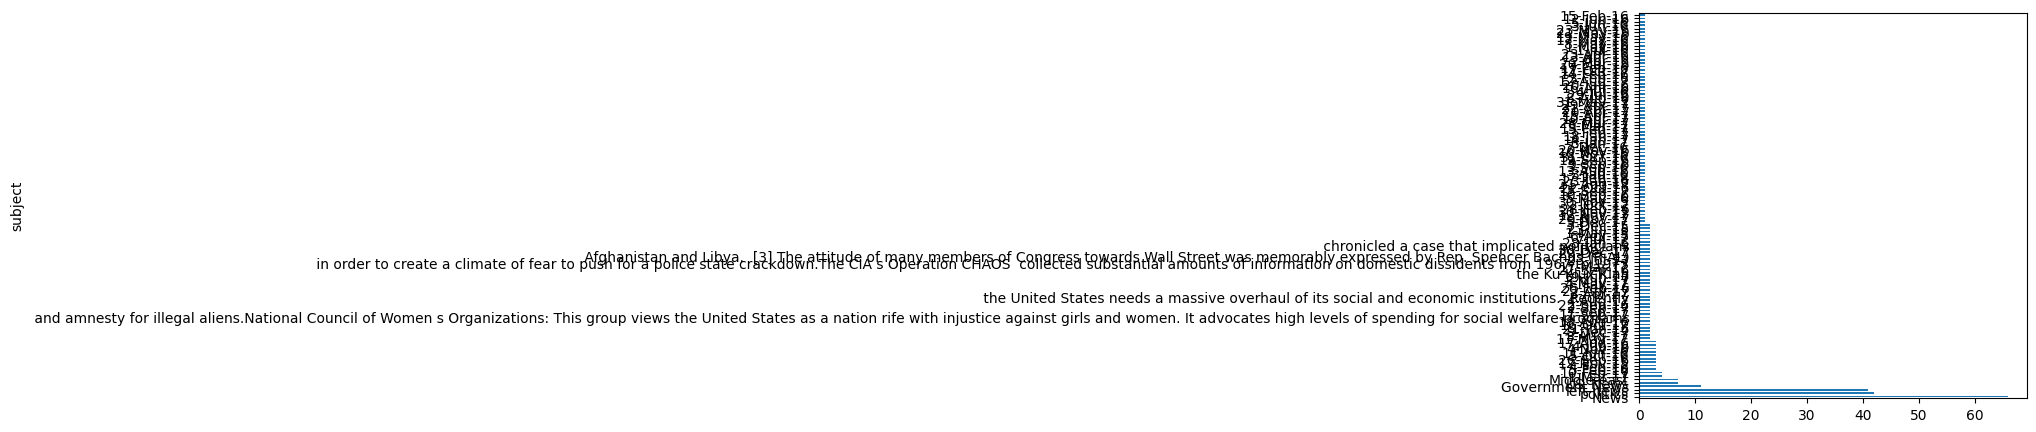

In [ ]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5


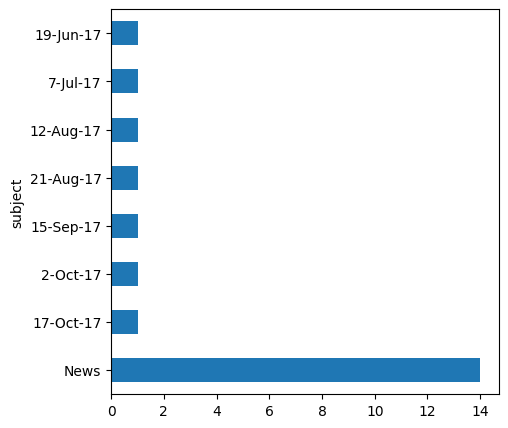

In [ ]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

# wordcloud real text data

In [ ]:
wordcld_mask=np.array(Image.open("wordcloud.png"))

In [ ]:
# Convert all elements to strings before joining
wordcld_text = " ".join([str(x) for x in real_data["text"].tolist()])

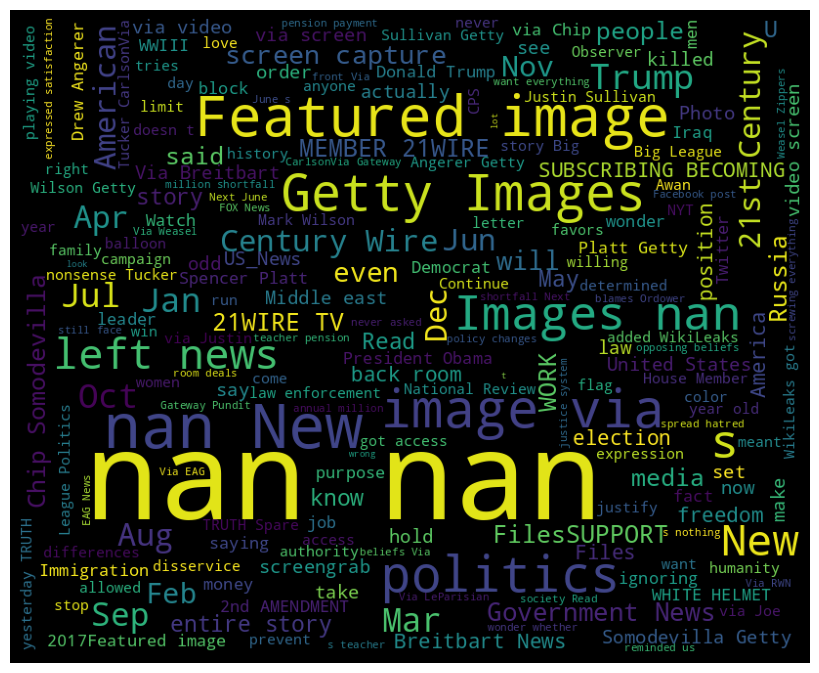

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# wordcloud fake text data

In [ ]:
fake_text = " ".join([str(x) for x in fake_data["text"].tolist()])

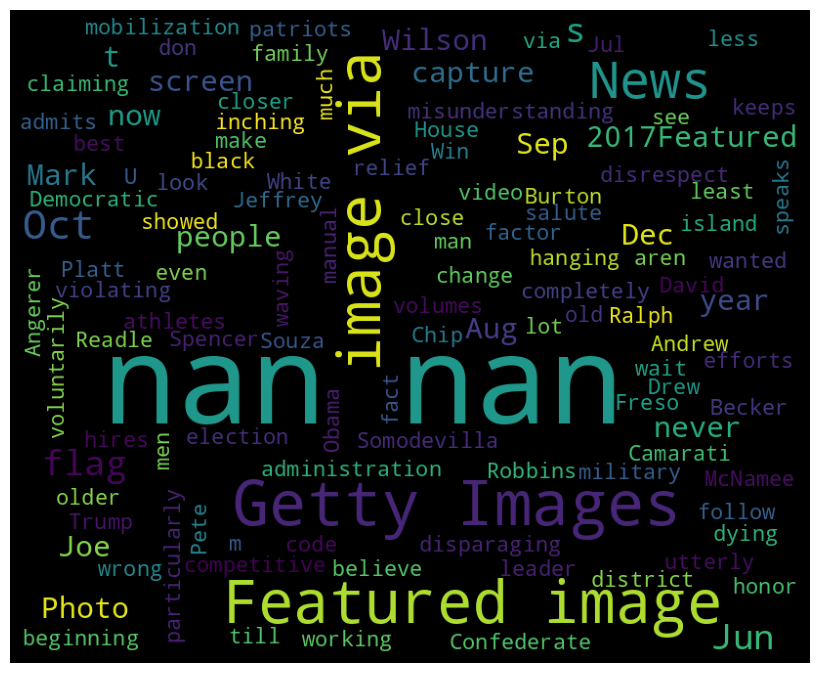

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fake_data["label"]="fake"
real_data["label"]="real"

In [ ]:
final_data= pd.concat([fake_data,real_data])

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
final_data.head(10)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
9,so that if anything happens to me it s not g...,he added. WikiLeaks got access before he wa...,Government News,2-Aug-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real


In [ ]:
final_data.isnull().sum()

,0
title,21997
text,22218
subject,22406
date,22565
Unnamed: 4,22753
...,...
Unnamed: 168,22765
Unnamed: 169,22765
Unnamed: 170,22765
Unnamed: 171,22765


In [ ]:
final_data.drop(["subject","date"], axis=1)

,title,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
22761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
22762,Democrats are drawing a distinction between t...,accused of sexual abuse of underage girls.A D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
22763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real


In [ ]:
final_data.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real


In [ ]:
final_data.label.value_counts()

,count
label,
real,21692
fake,1073


<Axes: xlabel='label', ylabel='count'>

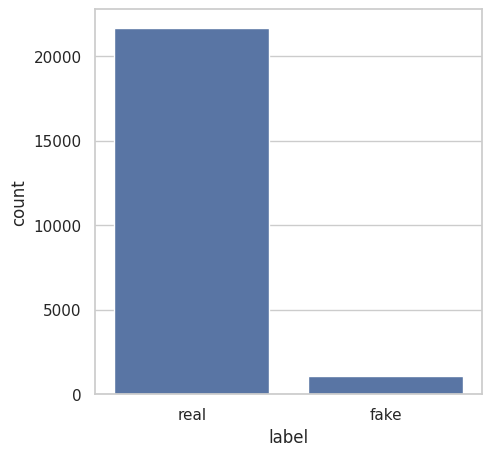

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [ ]:
final_data.head(5)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,real


In [ ]:
final_data["text"]=final_data["title"]+final_data["text"]

In [ ]:
final_data=final_data[["text","label"]]

In [ ]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [ ]:
final_data.sample(5)

,text,label
18898,NaN,1
10415,NaN,1
3697,NaN,1
4505,NaN,1
19912,NaN,1


In [ ]:
# Try to access the element at the 9943rd position if it exists within the DataFrame's size.
if 9943 < len(final_data):
    value = final_data.label.iloc[9943]
    print(value)
else:
    print(f"Index 9943 is out of bounds for the DataFrame with {len(final_data)} rows.")


1


In [ ]:
final_data.head() # To view the first few rows and their indices
final_data.tail() # To view the last few rows and their indices

,text,label
22760,NaN,1
22761,NaN,1
22762,Democrats are drawing a distinction between t...,1
22763,NaN,1
22764,NaN,1


In [ ]:
# Example: Accessing the value at index 5
final_data.label[5]

1

In [ ]:
# Instead of directly trying to access index 36709,
# check if the index is within the bounds of the DataFrame:
if 36709 < len(final_data):
    text_value = final_data.text.iloc[36709]
    print(text_value) # Print the value if found
else:
    print(f"Index 36709 is out of bounds for the DataFrame with {len(final_data)} rows.")

# Accessing using .loc if 'text' is a column and index 36709 exists:
try:
    text_value = final_data.loc[36709, 'text']
    print(text_value)
except KeyError:
    print(f"Index 36709 does not exist in the DataFrame.")

Index 36709 is out of bounds for the DataFrame with 22765 rows.
Index 36709 does not exist in the DataFrame.


In [ ]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
def tokenize(X):
    # Convert the Series to a list and handle NaN values
    X = X.fillna('').astype(str).tolist()  # Replace NaN with empty string and convert to list of strings

    X = bert_tokenizer(
        text=X,  # Pass the list of strings
        add_special_tokens=True,
        max_length=100,
        truncation=True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    return X

In [ ]:
maxlen=100

# create bert model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model

class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        return self.bert(inputs)[1]

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertLayer(bert_model)
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})

    x = Dropout(0.5)(pooled_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# Create the model
model = create_model(bert_model)

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer_2 (BertLayer)  │ (None, 768)            │              0 │ attention_mask[0][0],  │
│                           │                        │                │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 768)            │              0 │ bert_layer_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │         49,216 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # or another metric you want to monitor
    patience=3,  # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=3,  # Number of epochs with no improvement to wait before reducing the learning rate
    verbose=1,
    min_lr=1e-6  # Minimum learning rate
)

In [ ]:
from transformers import AutoTokenizer

# Make sure 'bert_model' is your pre-trained BERT model object.
tokenizer = AutoTokenizer.from_pretrained(bert_model.name_or_path) # Get tokenizer from your bert_model

def tokenize_data(data, maxlen=100):
    """Tokenizes the input data using the pre-trained tokenizer.

    Args:
        data: The input data to be tokenized.
        maxlen: Maximum sequence length for padding/truncation.

    Returns:
        A dictionary containing the tokenized input IDs and attention masks.
    """
    # Convert NaN values to empty strings before tokenization
    data = data.fillna('').astype(str).tolist()
    encodings = tokenizer(
        data, # Assuming 'data' is a Pandas Series
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        max_length=maxlen,
        return_tensors='tf' # Return TensorFlow tensors
    )
    return encodings

# Assuming you have X_train and X_test available:
X_train_token = tokenize_data(X_train, maxlen=100)
X_test_token = tokenize_data(X_test, maxlen=100)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model
import tensorflow as tf
from transformers import TFAutoModel

class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs # Unpack the inputs
        # Pass input_ids and attention_mask as positional arguments
        return self.bert(input_ids, attention_mask=attention_mask)[1]
        # Assuming you want the pooled output (index 1)

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertLayer(bert_model)
    # Pass inputs as a list to the BertLayer
    pooled_output = bert_layer([input_ids, attention_mask])

    x = Dropout(0.5)(pooled_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# Assuming 'bert_model' is already defined (e.g., from 'transformers' library)
# Replace 'your_bert_model_name' with the actual name of your pre-trained model.

# Use TFAutoModel for TensorFlow compatibility
bert_model = TFAutoModel.from_pretrained('bert-base-uncased')

# Create the model
model = create_model(bert_model)

# Display the model summary
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer_3 (BertLayer)  │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 768)            │              0 │ bert_layer_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │         49,216 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFAutoModel
# ... (rest of your code)

# Confusion matrix

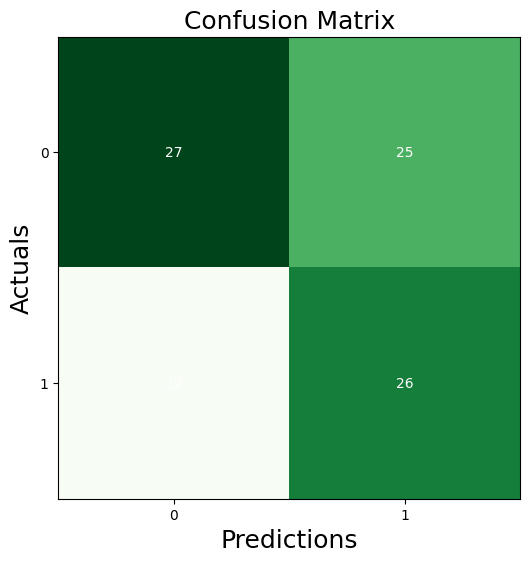

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # Import numpy for sample data

# Sample data for demonstration - replace with your actual data
Y_test = np.random.randint(0, 2, size=100)  # Replace with your actual Y_test
y_pred = np.random.randint(0, 2, size=100)  # Replace with your actual y_pred

conf_matrix = confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report # Import the classification_report function
import numpy as np

# Assuming Y_test and y_pred are already defined as in your previous code
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53        52
           1       0.51      0.54      0.53        48

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (rest of your code)

y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

# Extract the probabilities for the positive class (assuming binary classification)
y_pred_prob = y_pred_prob.logits[:, 1]  # or y_pred_prob[0] if logits is not present
# y_pred_prob should now be a 1D array with probabilities for each sample

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

28/28 [==============================] - 153s 5s/step


28/28 [==============================] - 148s 5s/step


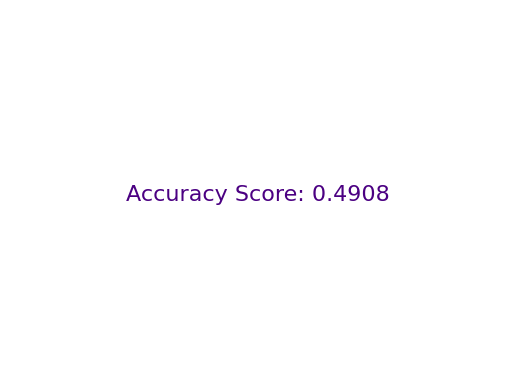

In [17]:
from sklearn.metrics import accuracy_score


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
# Access the logits from the TFSequenceClassifierOutput object
# pred was previously: pred = (y_pred_prob.logits > 0.5).astype(int)
# This created a 2D array which is interpreted as multilabel-indicator
# Instead, we select the class with the highest probability for each sample
pred = np.argmax(y_pred_prob.logits, axis=1)  # Get the predicted class index (0 or 1)

accuracy = accuracy_score(Y_test, pred)

plt.plot([])
plt.text(0, 0, f'Accuracy Score: {accuracy:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

28/28 [==============================] - 149s 5s/step


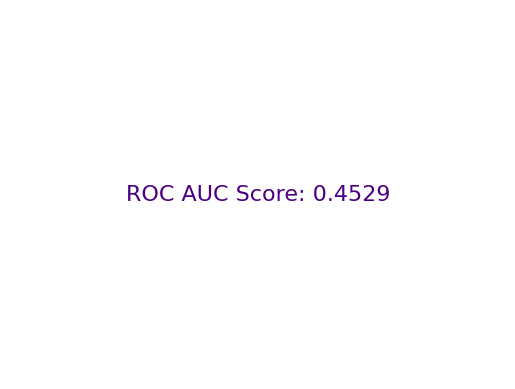

In [19]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
# Extract the probabilities for the positive class (assuming binary classification)
y_pred_prob = y_pred_prob.logits[:, 1]  # or y_pred_prob[0] if logits is not present

# y_pred_prob should now be a 1D array with probabilities for each sample
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'ROC AUC Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

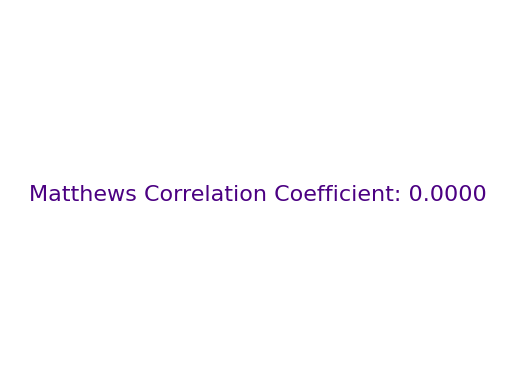

In [21]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_test and y_pred are already defined

# Calculate Matthews Correlation Coefficient
matthews_corr = matthews_corrcoef(Y_test, pred)  # Assuming 'pred' is defined as in your previous cells


# Plot Matthews Correlation Coefficient
plt.plot([])
plt.text(0, 0, f'Matthews Correlation Coefficient: {matthews_corr:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

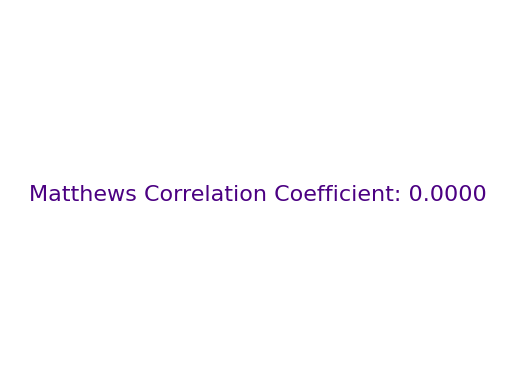

In [23]:
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_test and y_pred are already defined

# Calculate Matthews Correlation Coefficient
matthews_corr = matthews_corrcoef(Y_test, pred)  # Assuming 'pred' is defined as in your previous cells


# Plot Matthews Correlation Coefficient
plt.plot([])
plt.text(0, 0, f'Matthews Correlation Coefficient: {matthews_corr:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

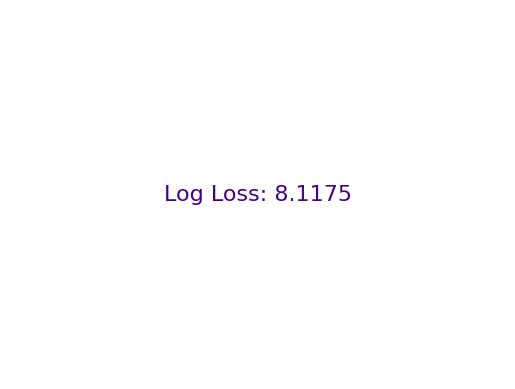

In [24]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

log_loss_value = log_loss(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'Log Loss: {log_loss_value:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


# Custom data prediction

In [25]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [28]:
!pip install nltk

import nltk
nltk.download('punkt')

!pip install nltk

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel"
word_tokenize(test_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Cop',
 'Shares',
 'Racist',
 'Meme',
 'About',
 'Michelle',
 'Obama',
 ';',
 'Now',
 'That',
 'Cop',
 'Is',
 'Having',
 'A',
 'VERY',
 'Bad',
 'Day',
 '(',
 'IMAGES',
 ')',
 'After',
 'the',
 'election',
 'of',
 'Donald',
 'Trump',
 'many',
 'folks',
 'seem',
 'to',
 'see',
 'it',
 'as',
 'a',
 'permission',
 'slip',
 'to',
 'be',
 'as',
 'racist',
 'and',
 'vile',
 'as',
 'possible',
 '.',
 'However',
 ',',
 'here',
 's',
 'the',
 'thing',
 ',',
 'you',
 're',
 'still',
 'going',
 'to',
 'get',
 'called',
 'out',
 'as',
 'racist',
 'and',
 'vile',
 '.',
 'And',
 'one',
 'Alabama',
 'police',
 'officer',
 'just',
 'found',
 'this',
 'out',
 'the',
 'hard',
 'way.According',
 'to',
 'the',
 'Washington',
 'Post',
 ':',
 'Talladega',
 'Police',
 'Officer',
 'Joel']

In [31]:
from transformers import AutoTokenizer
import numpy as np

# Assuming your model is a BERT model, replace 'bert-base-uncased' with the actual model name if different
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

test_token = tokenizer(test_text, return_tensors='tf', padding=True, truncation=True)

# Get the prediction logits
predictions = model.predict({
    'input_ids' : test_token['input_ids'],
    'attention_mask' : test_token['attention_mask']
})

# Assuming your model outputs logits, apply sigmoid to get probabilities
import tensorflow as tf  # Import tensorflow
probabilities = tf.sigmoid(predictions.logits) # Access the logits and apply sigmoid

# Now you can apply np.where on probabilities
test_text_pred = np.where(probabilities >= 0.5, 1, 0)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1/1 [==============================] - 0s 346ms/step


In [32]:
test_text_pred

array([[0, 0]])

In [34]:
if (test_text_pred[0][0] == 0 and test_text_pred[0][1] == 0):  # Compare individual elements of the array
    print("News is Fake")
else:
    print("News is Real")

News is Fake


In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [3]:
!pip install gradio # Install the missing 'gradio' package

import gradio as gr
from transformers import AutoTokenizer
import numpy as np
import tensorflow as tf

# Assuming your model is a BERT model, replace 'bert-base-uncased' with the actual model name if different
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def predict_news(news_text):
    test_token = tokenizer(news_text, return_tensors='tf', padding=True, truncation=True)
    predictions = model.predict({ # "model" variable needs to be defined/loaded before this line.
        'input_ids': test_token['input_ids'],
        'attention_mask': test_token['attention_mask']
    })
    probabilities = tf.sigmoid(predictions.logits)
    test_text_pred = np.where(probabilities >= 0.5, 1, 0)
    if test_text_pred[0][0] == 0:
        return "News is Fake"
    else:
        return "News is Real"

iface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=10, placeholder="Enter news text here..."),
    outputs="text",
    title="Fake News Detector",
    description="Enter news text to check if it's fake or real.",
)

iface.launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f44968189d3257869.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
